[Home](../README.md)

### Data Preprocessing


#### Load the required dependencies

Load the two required dependencies:

- [Pandas](https://pandas.pydata.org/) is library for data analysis and manipulation.
- [Matplotlib](https://matplotlib.org) a comprehensive library for creating static, animated, and interactive visualizations in Python. A customised stylesheet for the visualisations is also applied.

In [7]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')

####  Store the data as a local variable

The data frame is a Pandas object that structures your tabular data into an appropriate format. It loads the complete data in memory so it is now ready for preprocessing.

In [8]:
data_frame = pd.read_csv("movies.csv")

#### Data Snapshot

It is important to get a high-level look at your dataset to understand what you are working with. Printing the complete data might be impossible for large-scale datasets where the rows can be in thousands or even millions.

You can use the `head()` and `tail()` method call to inspect the first and last 5 rows of your dataset.

In [9]:
# Target = A measure of disease progression in one year
data_frame.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


####  Data Summary
 
The `info()` method call prints a summary of each column, giving you more information about the specific data types, total number of rows, null values and memory usage.

In [10]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


#### Statistics For Numerical Columns
 
The `describe()` method call provides basic statistical knowledge like the mean and spread of the data.

In [11]:
data_frame.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


#### Graphically present the data

At this early stage you are just wanting to evaluate the data, the below simple plots lets you look the data in different ways to inform your model design and data wrangling approaches.

<Axes: >

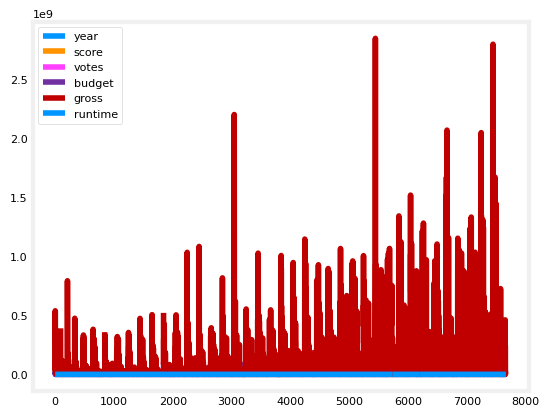

In [12]:
# plot a line graph 
data_frame.plot()

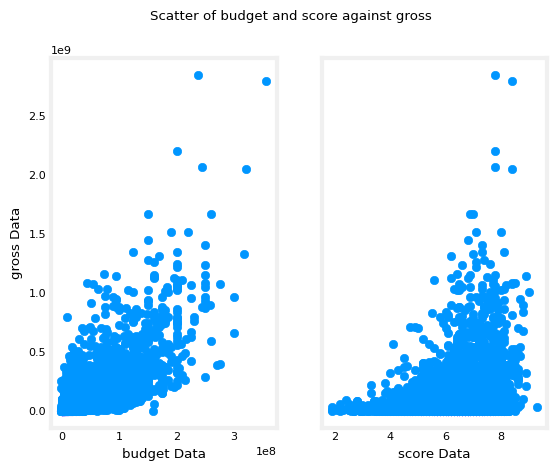

In [20]:
# Scatter plot 2 columns in separate charts with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
plt.suptitle(f"Scatter of {data_frame['budget'].name} and {data_frame['score'].name} against {data_frame['gross'].name}")
ax1.set_ylabel(f'{data_frame['gross'].name} Data')

ax1.scatter(data_frame['budget'], data_frame['gross'])
ax1.set_xlabel(f'{data_frame['budget'].name} Data')

ax2.scatter(data_frame['score'], data_frame['gross'])
ax2.set_xlabel(f'{data_frame['score'].name} Data')

plt.show()

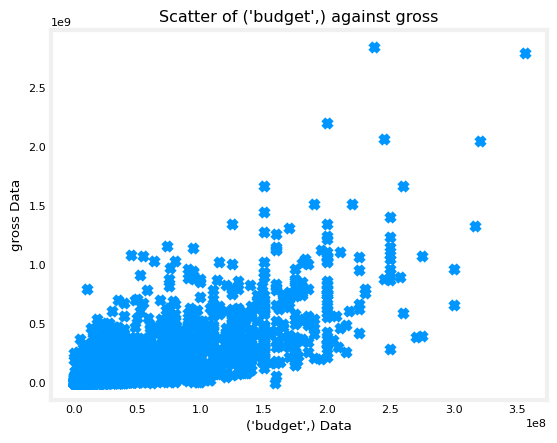

In [13]:
# Scatter plot multiples columns to see the relationship
x_plot = ['budget']
for col in x_plot:
    plt.scatter(data_frame[col], data_frame['gross'], marker='x')
plt.title(f"Scatter of {*x_plot,} against {data_frame['gross'].name}")
plt.ylabel(f'{data_frame['gross'].name} Data')
plt.xlabel(f'{*x_plot,} Data')
plt.show()

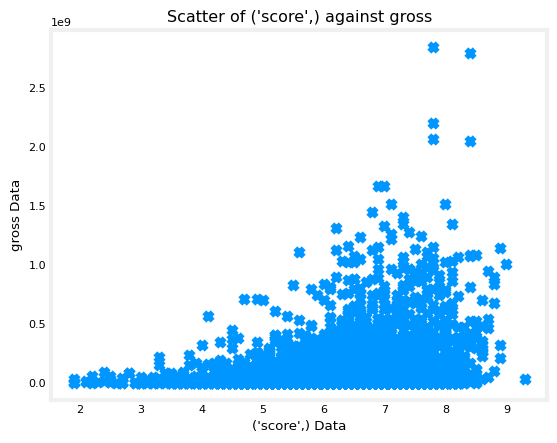

In [17]:
x_plot = ['score']
for col in x_plot:
    plt.scatter(data_frame[col], data_frame['gross'], marker='x')
plt.title(f"Scatter of {*x_plot,} against {data_frame['gross'].name}")
plt.ylabel(f'{data_frame['gross'].name} Data')
plt.xlabel(f'{*x_plot,} Data')
plt.show()